In [168]:
f=open('./day11/input.txt','r')
lines = f.readlines()
f.close()

In [161]:
lines = ['L.LL.LL.LL',
'LLLLLLL.LL',
'L.L.L..L..',
'LLLL.LL.LL',
'L.LL.LL.LL',
'L.LLLLL.LL',
'..L.L.....',
'LLLLLLLLLL',
'L.LLLLLL.L',
'L.LLLLL.LL']

In [172]:
xsize,ysize = len(lines[0]),len(lines)

In [174]:
grid = np.empty((ysize,xsize))
for x,line in enumerate(lines):
    for y,l in enumerate(line.replace('\n','')):
        if l =='.':
            grid[x,y] = 0
        elif l == 'L':
            grid[x,y] = 1
        elif l =='#':
            grid[x,y] == 2
            

In [175]:
grid

array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000,             nan],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000,             nan],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 2.19205914e-293],
       ...,
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [177]:
# pad the grid with zero border
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    
grid = np.pad(grid, 1, pad_with)


If a seat is empty (L) and there are no occupied seats adjacent to it, the seat becomes occupied.

If a seat is occupied (#) and four or more seats adjacent to it are also occupied, the seat becomes empty.

Otherwise, the seat's state does not change.


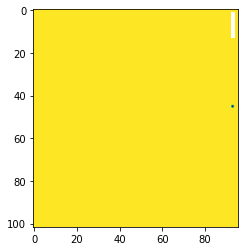

In [178]:
import matplotlib.pyplot as plt

plt.imshow(grid)

In [180]:
import copy
import numpy as np


xsize= len(lines) 
ysize = len(lines[0])

print(xsize,ysize)

grid = np.zeros((ysize,xsize))
for y,line in enumerate(lines):
    for x,l in enumerate(line.replace('\n','')):
        if l =='.':
            grid[x,y] = 0
        elif l == 'L':
            grid[x,y] = 1
        elif l =='#':
            grid[x,y] == 2
    
grid = np.pad(grid, 1, pad_with)
#print(grid.shape)
vals = []
while True:
    ogrid = (grid>1).astype(int)
    newgrid = np.empty((ysize,xsize))
    newgrid = np.pad(newgrid, 1, pad_with)
    for x in range(1,ysize+1):
        for y in range(1,xsize+1):
            if x>0 and x<=ysize and y>0 and y<=xsize:
                seatsaround = ogrid[x,y+1]+ogrid[x,y-1]+ogrid[x+1,y]+ogrid[x-1,y]+ogrid[x+1,y+1]+ogrid[x+1,y-1]+ogrid[x-1,y-1]+ogrid[x-1,y+1]
                #print(seatsaround)
                if seatsaround == 0 and (grid[x,y] == 1):
                    newgrid[x,y] = 2
                elif (grid[x,y] == 2) and seatsaround>=4:
                    newgrid[x,y] = 1
                else:
                    newgrid[x,y] = grid[x,y]
    
    grid = newgrid.copy()
    sat = np.sum(newgrid==2)
    vals.append(sat)
    print(sat)
    if len(vals)>10:
        if vals[-1] == vals[-2] == vals[-3]== vals[-4] == sat:
            print(sat)
            break

98 92
(94, 100)
7342
159
6895
350
6373
536
5904
689
5570
810
5336
908
5125
1017
4920
1125
4712
1221
4497
1307
4313
1401
4128
1483
3951
1564
3786
1635
3650
1696
3541
1749
3443
1798
3345
1835
3252
1890
3138
1931
3044
1971
2965
2009
2884
2049
2821
2078
2762
2109
2701
2141
2647
2160
2604
2178
2570
2196
2537
2212
2514
2221
2498
2226
2491
2229
2485
2232
2477
2236
2465
2242
2453
2248
2440
2254
2428
2261
2417
2265
2406
2271
2395
2277
2382
2283
2365
2290
2346
2293
2343
2295
2337
2300
2328
2303
2321
2306
2315
2310
2310
2310
2310
2310


part 2

In [184]:
import copy
import numpy as np


def get_visible_neighbours(grid, xpos, ypos):
    occupied = 0
    for y in range(-1, 2):
        for x in range(-1, 2):
            if x == 0 and y == 0:
                continue
            occupied += raytrace(grid, xpos, ypos, x, y)
    return occupied


def raytrace(grid, xpos, ypos, xdir, ydir):
    x = xpos + xdir
    y = ypos + ydir
    while 0 <= x < len(grid[0]) and 0 <= y < len(grid):
        if grid[y][x] == 2:
            return 1
        if grid[y][x] == 1:
            return 0
        x += xdir
        y += ydir
    return 0

xsize= len(lines) 
ysize = len(lines[0])

print(xsize,ysize)

grid = np.zeros((ysize,xsize))
for y,line in enumerate(lines):
    for x,l in enumerate(line.replace('\n','')):
        if l =='.':
            grid[x,y] = 0
        elif l == 'L':
            grid[x,y] = 1
        elif l =='#':
            grid[x,y] == 2
    
grid = np.pad(grid, 1, pad_with)
#print(grid.shape)
vals = []
while True:
    ogrid = (grid>1).astype(int)
    newgrid = np.empty((ysize,xsize))
    newgrid = np.pad(newgrid, 1, pad_with)
    for x in range(1,ysize+1):
        for y in range(1,xsize+1):
            if x>0 and x<=ysize and y>0 and y<=xsize:
                
                seatsaround = get_visible_neighbours(grid,y,x)

                if seatsaround == 0 and (grid[x,y] == 1):
                    newgrid[x,y] = 2
                elif (grid[x,y] == 2) and seatsaround>=5:
                    newgrid[x,y] = 1
                else:
                    newgrid[x,y] = grid[x,y]
    
    grid = newgrid.copy()
    sat = np.sum(newgrid==2)
    vals.append(sat)
    print(sat)
    if len(vals)>10:
        if vals[-1] == vals[-2] == vals[-3]== vals[-4] == sat:
            print(sat)
            break

98 92
(94, 100)
7342
5
7328
13
7303
25
7267
42
7218
60
7164
86
7095
114
7020
146
6928
181
6837
224
6713
267
6596
313
6470
368
6314
427
6157
490
5984
563
5799
636
5600
719
5389
798
5173
895
4941
985
4711
1070
4482
1160
4273
1240
4071
1322
3860
1395
3687
1462
3501
1535
3330
1592
3176
1656
3025
1713
2888
1761
2769
1807
2658
1849
2555
1889
2458
1925
2374
1958
2297
1986
2230
2011
2175
2034
2134
2051
2098
2063
2076
2074
2074
2074
2074
2074
